# Application in Machine Learning

## Setup

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('dark_background')
%matplotlib inline

## Supervised Machine Learning - Linear Regression

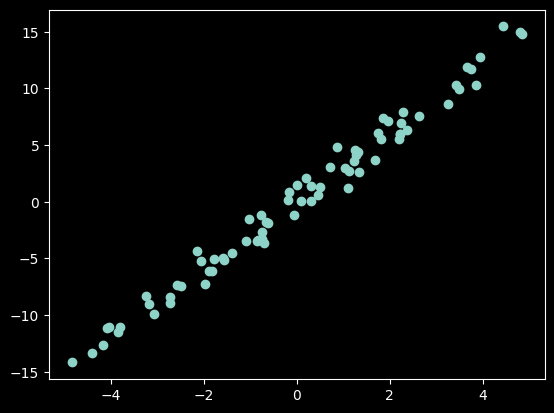

In [10]:
# Plot basic scatterplot
rng = np.random.RandomState(123)
x = 10 * rng.rand(75) - 5
y = x * 3 + rng.randn(75)
plt.scatter(x, y)
plt.show()

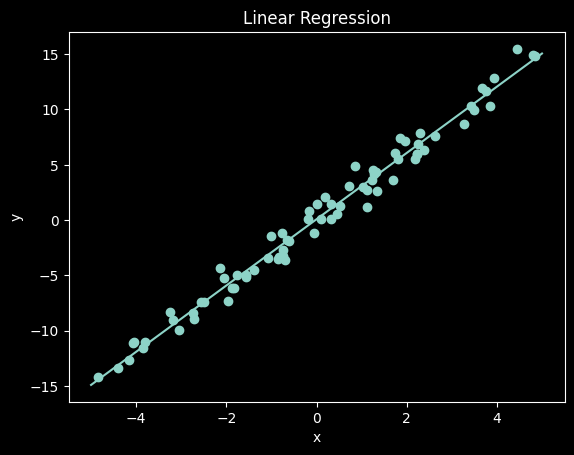

In [11]:
from sklearn.linear_model import LinearRegression

# Create model
model = LinearRegression(fit_intercept=True)
X = x[:, np.newaxis]
model.fit(X, y)
xfit = np.linspace(-5, 5)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

# Plot the scatter plot and the line of best fit
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.title("Linear Regression")   
plt.xlabel("x")                 
plt.ylabel("y")                 
plt.show()

In [12]:
# Regression data
print(f"Slope:      {model.coef_}\ny-intercept: {model.intercept_}")

Slope:      [2.99538529]
y-intercept: 0.08011381035205964


## Unsupervised Machine Learning - k-Means Clustering

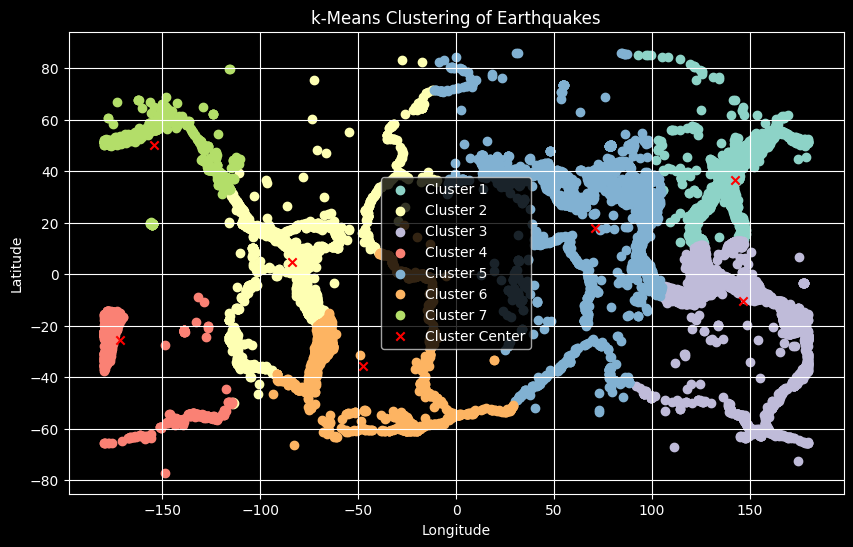

In [13]:
# k-Means Clustering 2-D

# Handles CSV data
data = pd.read_csv('earthquakes.csv')
x = data[['Latitude', 'Longitude']].values

# Set up kmeans
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(x)
labels = kmeans.labels_
cCenters = kmeans.cluster_centers_

# Setup figure and plot clusters and centers
plt.figure(figsize=(10, 6))
for cLabel in range(7):
    plt.scatter(x[labels == cLabel, 1], x[labels == cLabel, 0], label=f'Cluster {cLabel + 1}')
plt.scatter(cCenters[:, 1], cCenters[:, 0], marker='x', color='red', label='Cluster Center')

# Labels, title, and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('k-Means Clustering of Earthquakes')
plt.legend()
plt.grid(True)
plt.show()

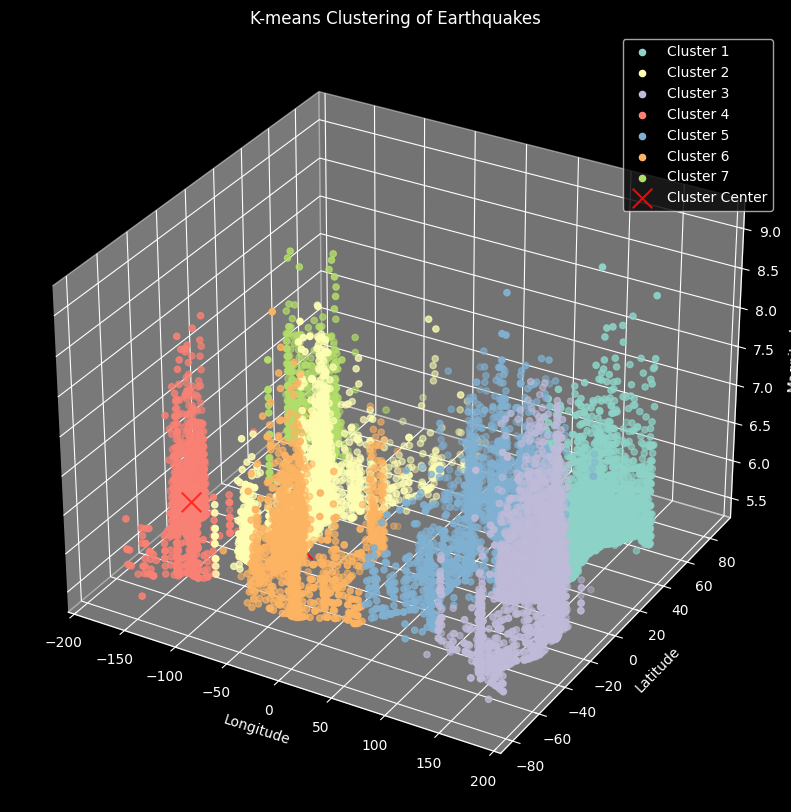

In [14]:
# k-Means Clustering 3-D

# Handle data
X = data[['Latitude', 'Longitude', 'Magnitude']].values

# Set up kmeans
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
cCenters = kmeans.cluster_centers_

# Setup 3-D plot and plot the scatter and the centers
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
for cLabel in range(7):
    ax.scatter(X[labels == cLabel, 1], X[labels == cLabel, 0], X[labels == cLabel, 2], label=f'Cluster {cLabel + 1}')
ax.scatter(cCenters[:, 1], cCenters[:, 0], cCenters[:, 2], marker='x', color='red', s=200, label='Cluster Center')

# Labels, title, and legend
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Magnitude')
ax.set_title('K-means Clustering of Earthquakes')
ax.legend()

# Show plot
plt.show()

## Application: A Face Detection Pipeline (HOG)

In [15]:
import cv2
import os
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [41]:
# Loads each image, transforms it to grey scale, and adds the image and the label argument to a list.
# Returns two list
def loadImages(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        # Use the cv2 library to load the image as grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None: 
            img_resized = cv2.resize(img, (64, 128))
            images.append(img_resized)
            labels.append(label)
    return images, labels

# Load images and label
pImages, pLabels = loadImages('Sheep', 'pos')
nImages, nLabels = loadImages('Spider', 'neg')

# Create lists with all data
images = pImages + nImages
labels = pLabels + nLabels

# Extract HOG data
hogData = []
for img in images:
    # Use the cells_per_block=(2, 2) arg due to error "ConvergenceWarning: Liblinear failed to converge, increase the number of iterations."
    data = hog(img, cells_per_block=(2, 2)) 
    hogData.append(data)


# Encode labels
lEncoder = LabelEncoder()
eLabels = lEncoder.fit_transform(labels)

# Train model
model = LinearSVC()
model.fit(hogData, eLabels)

# Evaluate model
prediction = model.predict(hogData)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3256
           1       0.99      0.99      0.99      1810

    accuracy                           1.00      5066
   macro avg       0.99      0.99      0.99      5066
weighted avg       1.00      1.00      1.00      5066

Accuracy: 0.9952625345440189


In [43]:
def testModel(folder, model, label_encoder):
    testImages, testLabels = loadImages(folder, 'test') 
    hogData = []
    for img in testImages:
        # Use the cells_per_block=(2, 2) arg due to error "ConvergenceWarning: Liblinear failed to converge, increase the number of iterations."
        data = hog(img, cells_per_block=(2, 2)) 
        hogData.append(data)
    predictions = model.predict(hogData)
    decoded_predictions = label_encoder.inverse_transform(predictions)
    return decoded_predictions

# Test the model on new images
new_image_folder = 'Test'  # Replace with the path to your test image folder
predictions = testModel(new_image_folder, model, lEncoder)

# Print the predictions for the new images
print("Predictions for new images:", predictions)

Predictions for new images: ['neg' 'pos' 'pos' 'pos' 'neg' 'neg' 'neg' 'neg' 'neg' 'neg']
